In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv('salaries.csv', sep = ',')

print(df.info())

print(df.head())

print(df.describe())

print(df.columns)

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37234 entries, 0 to 37233
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           37234 non-null  int64 
 1   experience_level    37234 non-null  object
 2   employment_type     37234 non-null  object
 3   job_title           37234 non-null  object
 4   salary              37234 non-null  int64 
 5   salary_currency     37234 non-null  object
 6   salary_in_usd       37234 non-null  int64 
 7   employee_residence  37234 non-null  object
 8   remote_ratio        37234 non-null  int64 
 9   company_location    37234 non-null  object
 10  company_size        37234 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB
None
   work_year experience_level employment_type             job_title  salary  \
0       2020               EN              FT   Azure Data Engineer  100000   
1       2020               EN              CT    Staff

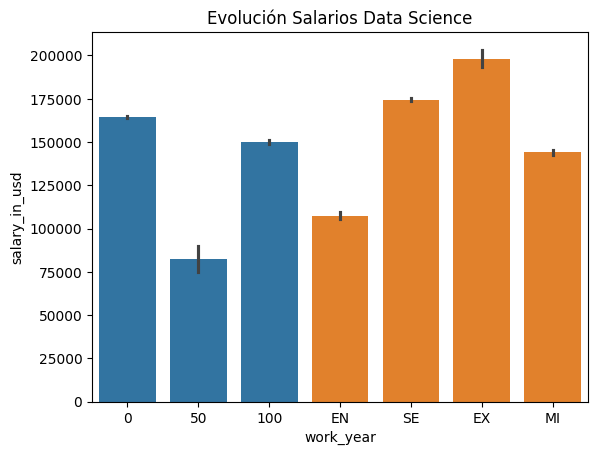

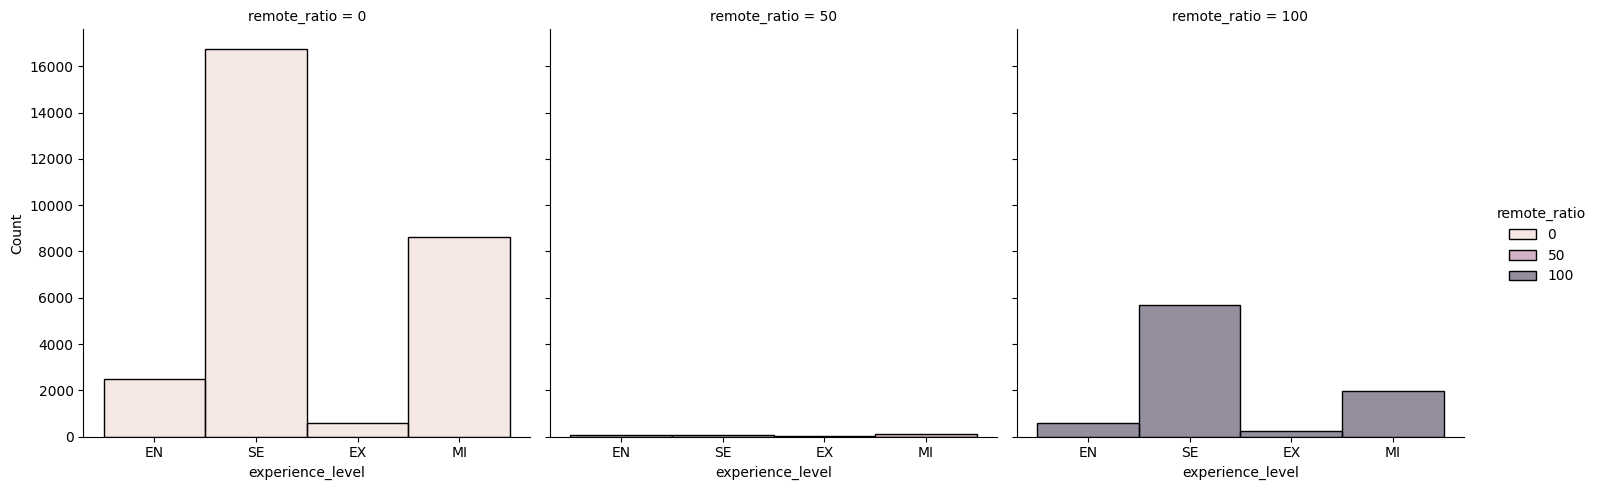

In [7]:
# Gráficos

import seaborn as sns
import pandas as pd
df = pd.read_csv('salaries.csv', sep = ',')
sns.lineplot(data=df, x="work_year", y= "salary_in_usd").set_title("Evolución Salarios Data Science")

sns.barplot(x="remote_ratio", y="salary_in_usd", data=df)
sns.barplot(x="experience_level", y="salary_in_usd", data=df)

sns.displot(data=df, x= "experience_level", hue="remote_ratio", col="remote_ratio")

In [8]:
# Tomo como variable objetivo salary_in_usd y voy a intentar predecir el salario con un modelo de aprendizaje supervisado
# con regresión lineal

# Preprocesamiento

from sklearn.preprocessing import LabelEncoder

# Entrenamiento

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Algoritmos

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor


In [9]:
# Preprocesamiento Label Encoder para las variables categóricas

column = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

df[column] = df[column].apply(LabelEncoder().fit_transform)

# Modelado

X = df.drop(['salary_in_usd'],axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

print('x_train size', X_train.shape)
print('y_train size', y_train.shape)
print('x_test size', X_test.shape)
print('y_test size', y_test.shape)


x_train size (26063, 10)
y_train size (26063,)
x_test size (11171, 10)
y_test size (11171,)


In [10]:
# Regresión Lineal (instanciamos el modelo)

model = LinearRegression()

# Entrenamiento

model.fit(X_train, y_train)

# Predicción

y_pred = model.predict(X_test)

# Medición

r2_rl = r2_score(y_test, y_pred)
r2_rl


0.2639108078793079

In [11]:
# KNN (instanciamos el modelo)

model = KNN(n_neighbors=5, weights="uniform", metric="manhattan")

# Entrenamiento

model.fit(X_train, y_train)

# Predicción

y_pred = model.predict(X_test)

# Medición

r2_knn = r2_score(y_test, y_pred)
r2_knn


0.9753379704213335

In [12]:
# XGBOOST (instanciamos el modelo)

model = XGBRegressor(n_estimators=2000 , max_depth= 7 , learning_rate = 0.01)

# Entrenamiento

model.fit(X_train, y_train)

# Predicción

y_pred = model.predict(X_test)

# Medición

r2_xgb = r2_score(y_test, y_pred)
r2_xgb


0.9914799928665161